In [2]:
import mne
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Explicação

Esse primeiro script deve preparar os dados brutos para o formato aceitável do segundo Script. No final, ele deve criar um arquivo com as seguintes características:
* Cada linha representa um registro de tempo
* O número de colunas deve ser o número de canais do EEG (ou qualquer outro sinal temporal) + 1 (coluna de saída)
* A coluna de saída deve se chamar 'Classe'

Esse script varia de problema para problema, dependendo das necessidades a serem cumpridas.

Obs: os 3 pontos listados acima é apenas para minimizar o trabalho do usuário, dado que o segundo script requer dados dessa forma. Qualquer mudança nesses pontos devem ser alterados no segundo script também!

In [3]:
# Essa primeira parte o usuário deve definir

run = 9
sub = 7
me = mne.io.read_raw_gdf(f"../DATA_RAW/motorexecution_subject{sub}_run{run}.gdf", stim_channel=-1)

Extracting EDF parameters from C:\Users\feammachado\Projects\EEG_TCC\Dados Internet\DATA_RAW\motorexecution_subject7_run9.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\users\feammachado\appdata\local\programs\python\python37\lib\site-packages\mne\io\edf\edf.py:1000: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
<ipython-input-3-40b250d8ba21>:5: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  me = mne.io.read_raw_gdf(f"../DATA_RAW/motorexecution_subject{sub}_run{run}.gdf", stim_channel=-1)


In [4]:
me_df = me.to_data_frame()
time = me_df[["time"]]
me_df = me_df.dropna().set_index("time")
index = me_df.index[(me_df == 0).sum(axis=1) < 20]
me_df = me_df.loc[index]
me_norm = (me_df - me_df.mean(axis=0))/me_df.std(axis=0)

In [5]:
me_norm

,F3,F1,Fz,F2,F4,FFC5h,FFC3h,FFC1h,FFC2h,FFC4h,...,elbowPosX,elbowPosY,elbowPosZ,ShoulderAdducti,ShoulderFlexion,ShoulderRotatio,Elbow,ProSupination,Wrist,GripPressure
time,,,,,,,,,,,,,,,,,,,,,
16,0.255748,-1.255028,-0.045246,-1.052997,2.739374,-2.335661,-2.284265,-2.037637,-1.100998,-1.142926,...,NaN,-2.833457,-0.735917,0.999997,0.999997,0.375957,0.471954,0.66995,-0.022207,NaN
18,0.089018,-1.350416,-0.152509,-1.299676,2.579276,-2.783910,-2.503637,-2.320027,-1.338105,-1.393909,...,NaN,-2.826764,-0.707260,0.999997,0.999997,0.375957,0.466825,0.66995,-0.020323,NaN
20,-0.423830,-2.002206,-1.008996,-2.175655,1.532022,-2.850569,-3.164720,-3.049643,-2.263311,-2.263321,...,NaN,-2.821862,-0.686550,0.999997,0.999997,0.375957,0.463076,0.66995,-0.018700,NaN
21,-0.945628,-2.604239,-1.596689,-2.608384,0.916963,-3.373183,-3.786946,-3.513654,-2.742504,-2.668775,...,NaN,-2.819205,-0.675564,0.999997,0.999997,0.375957,0.461048,0.66995,-0.017591,NaN
23,-1.960510,-3.652742,-2.660402,-3.202573,0.304136,-4.916538,-4.852630,-4.279245,-3.292928,-2.978963,...,NaN,-2.818902,-0.674594,0.999997,0.999997,0.375957,0.460818,0.66995,-0.017172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321990,0.523373,-0.458667,-0.903376,-0.399289,-1.325762,-0.564671,-0.160337,-0.494371,-0.804392,-0.555271,...,NaN,-0.668444,1.212832,0.999997,0.999997,0.375957,-0.340718,0.66995,-0.026218,NaN
321992,0.576694,-0.423227,-0.868078,-0.333144,-1.237791,-0.536851,-0.080476,-0.444420,-0.768714,-0.486667,...,NaN,-0.668510,1.218136,0.999997,0.999997,0.375957,-0.340882,0.66995,-0.026615,NaN
321994,0.639233,-0.379292,-0.823196,-0.317322,-1.203231,-0.541749,0.061211,-0.456440,-0.800925,-0.454318,...,NaN,-0.668448,1.223510,0.999997,0.999997,0.375957,-0.341093,0.66995,-0.026343,NaN


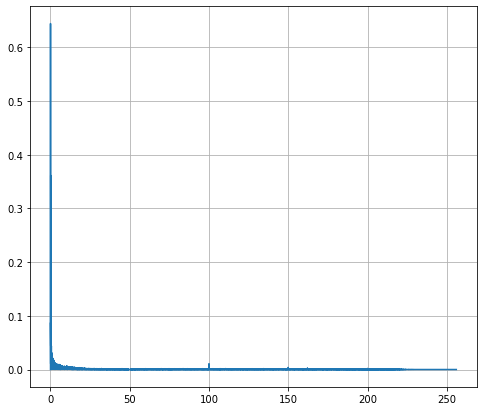

In [6]:
from scipy.fft import fft
from scipy.signal import resample
y = me_norm.values[:,0]
yf = fft(y)
fa = 512
T = 1/fa
N = y.size

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(8,7))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [7]:
time = time[time.time >= index[0]]

In [8]:
events, _ = mne.events_from_annotations(me)
t_col = events[events[:,2] == 1][:,0]
event_time = time.loc[t_col].values.flatten()
new_freq = 256

new_n = int(new_freq/fa*len(y))

new_time = index[0] + np.around(np.arange(new_n)*1000/new_freq)

new_df = pd.DataFrame([])

for i in range(61):
    col = f"Var_{i+1}"
    values = me_norm.values[:,i]
    new_df[col] = resample(values, new_n)
new_df.index = new_time

Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


In [9]:
ant = 50
pos = 50

for i in range(len(event_time)):
    cond = (new_df.index <= event_time[i] + pos) & (new_df.index >= event_time[i] - ant)
    index_time = new_df.index[cond]
    new_df.loc[index_time, "Classe"] = 1
new_df.fillna(0, inplace=True)

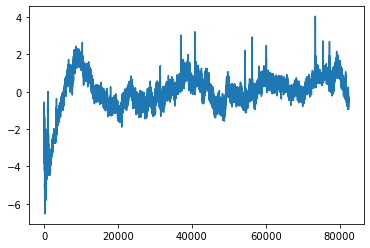

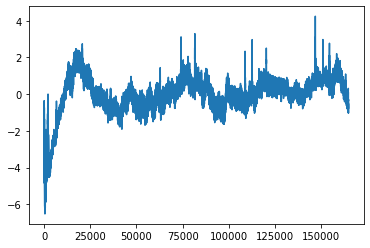

In [10]:
c = 3
plt.plot(np.arange(new_n), new_df.values[:,c])
plt.show()
plt.plot(np.arange(N), me_norm.values[:,c])
plt.show()

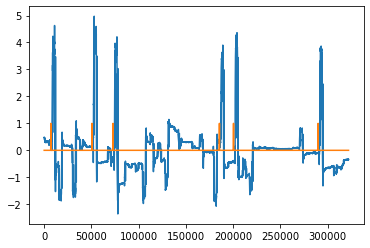

In [11]:
plt.plot(me_norm.index, me_norm.Elbow.values)
plt.plot(new_df.index, new_df.Classe.values)
plt.show()

In [12]:
new_df

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,...,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,Var_60,Var_61,Classe
16.0,0.261473,-1.053262,-0.236773,-0.860192,1.786891,-2.038452,-1.826274,-1.678788,-0.982810,-0.924291,...,-3.431213,-3.691783,-4.074784,-3.815272,-3.735929,-4.074639,-3.727585,-4.214563,-4.441120,0.0
20.0,-0.315945,-1.939436,-0.792659,-2.090196,1.969030,-2.990392,-3.200374,-3.040617,-2.167358,-2.234189,...,-5.896496,-6.397339,-6.501668,-6.128565,-6.053338,-6.667074,-6.553382,-6.808482,-7.264971,0.0
24.0,-1.850998,-3.470410,-2.528900,-3.075814,0.142605,-4.457240,-4.574181,-4.072788,-3.175552,-2.850106,...,-5.062872,-4.739353,-7.347955,-6.095897,-6.014944,-5.906565,-5.302058,-6.653335,-6.634337,0.0
28.0,-0.276101,-1.841593,-0.663274,-1.635784,2.266323,-3.327777,-3.013548,-2.634584,-1.703959,-1.634974,...,-5.221605,-5.838111,-6.274470,-5.508880,-5.476698,-5.965988,-5.865658,-6.147818,-6.404036,0.0
32.0,-0.126727,-1.832529,-0.762856,-1.504550,2.193740,-2.800584,-2.923165,-2.568300,-1.515432,-1.134510,...,-5.059334,-5.732095,-5.949491,-5.434687,-5.345473,-5.862549,-5.779738,-6.031689,-6.345947,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321981.0,0.341357,-0.685685,-1.202184,-0.643960,-1.664669,-0.718644,-0.430765,-0.807548,-1.122073,-0.815090,...,-0.105520,-0.017776,0.055201,-0.660752,-0.546185,-0.404181,0.274742,-0.135930,-0.318658,0.0
321985.0,0.398964,-0.644206,-1.039274,-0.565200,-1.420177,-0.780113,-0.369156,-0.754907,-1.054231,-0.745160,...,-0.198905,-0.113136,-0.104441,-0.783524,-0.683546,-0.500786,0.145511,-0.347947,-0.487950,0.0
321989.0,0.515466,-0.476063,-0.978729,-0.428226,-1.562904,-0.574430,-0.299558,-0.522068,-0.897367,-0.656845,...,0.084040,0.219308,0.174001,-0.525260,-0.383588,-0.179520,0.518137,-0.002406,-0.126404,0.0
321993.0,0.572196,-0.438057,-0.800296,-0.337645,-1.037373,-0.628844,-0.069857,-0.494429,-0.748019,-0.453362,...,-0.178790,-0.046105,0.055094,-0.697134,-0.579895,-0.460720,0.153646,-0.306185,-0.487869,0.0


In [10]:
if not os.path.isdir(f"../DATA_TIDY/subject {sub}"):
    os.mkdir(f"../DATA_TIDY/subject {sub}")

new_df.to_parquet(f"../DATA_TIDY/subject {sub}/data{sub}pp_{run}.parquet")